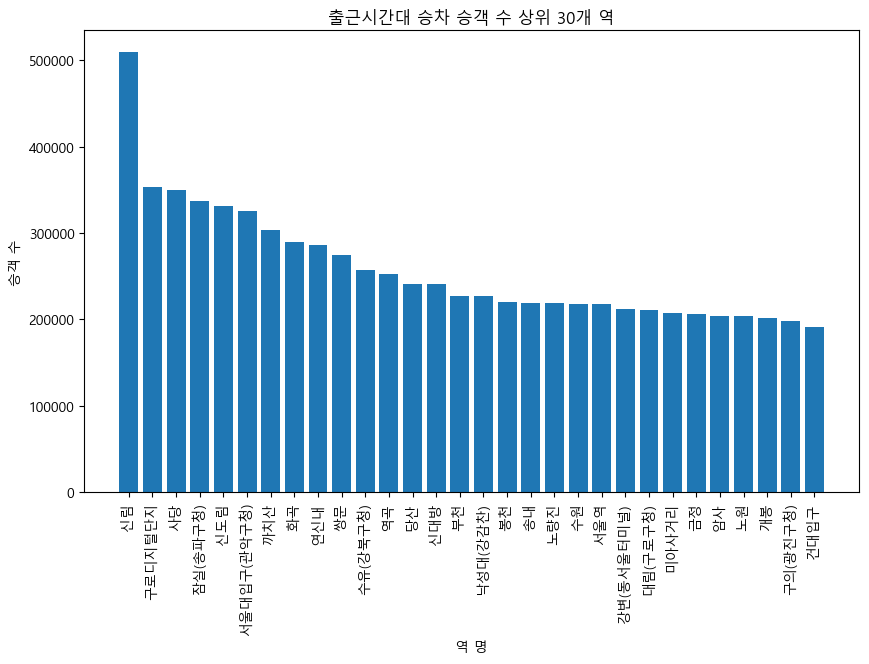

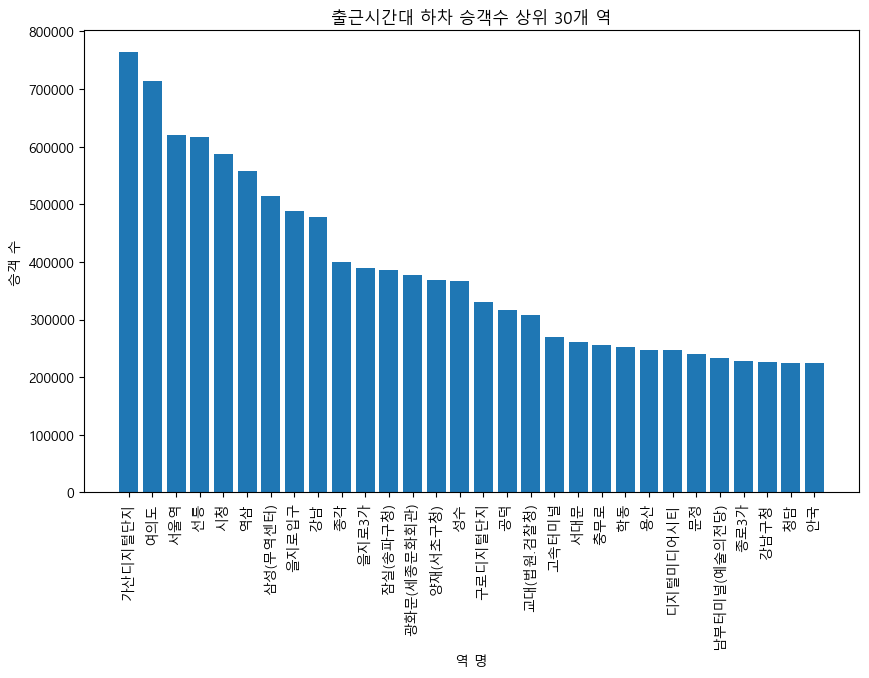

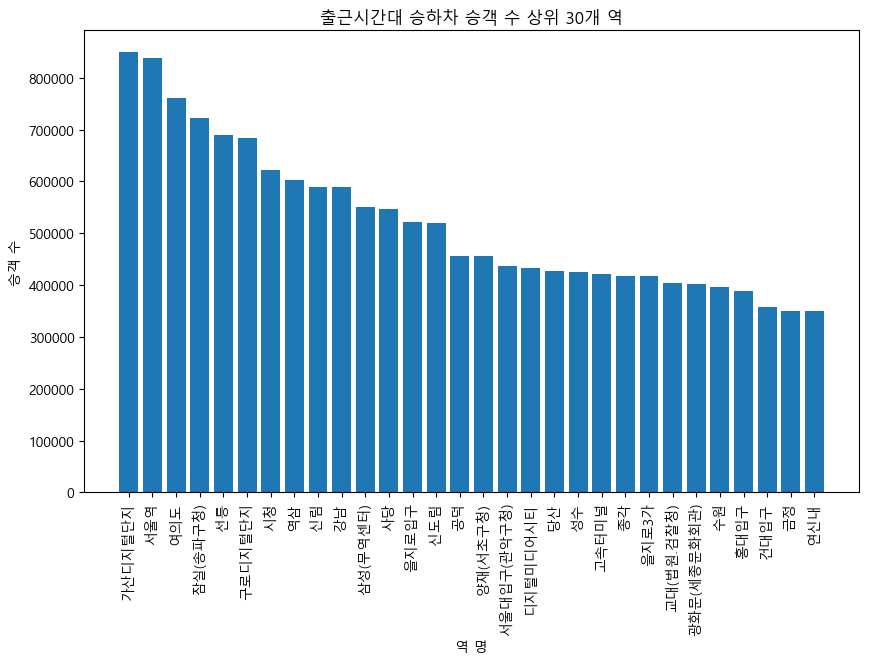

2023년 3월의 교통카드 통계자료를 이용하여 출근시간대 각 역의 승하차 승객 수를 비교한 결과이다.
출근시간대는 7시에서 9시 이므로, 통계자료 중 7시정각에서 8시 59분 69초까지의 역별 승하차 승객 수를 이용하였다.
환승역의 경우 다른 호선의 이용자를 모두 합하여 계산하였다. 예를들어 건대입구역의 경우 2호선과 7호선이 동시에 지나가므로, 건대입구역 2호선 승하차 승객 수와 7호선 승하차 승객 수를 합하여 계산하였다.
그 결과 출근시간대 가장 많은 사람이 승차하는 역은 신림역이고, 가장 많은 사람이 하차하는 역은 가산디지털단지역이었으며, 가장 많은 사람이 승하차하는 역 또한 가산디지털단지역이었다.


In [4]:
import csv
import matplotlib.pyplot as plt

def main():
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    f = open('subway.csv')
    station_on = {}
    station_off = {}
    station_onoff = {}

    data = csv.reader(f)
    next(data)
    next(data)
    
    for row in data :
        users_on = int(row[10])+int(row[12])
        users_off = int(row[11])+int(row[13])
        
        if row[3] in station_on :
            users_on = station_on.get(row[3])+users_on
            del station_on[row[3]]
        if row[3] in station_off :
            users_off = station_off.get(row[3])+users_off
            del station_off[row[3]]
            
        station_on[row[3]] = users_on
        station_off[row[3]] = users_off
        
    for i in station_on :
        station_onoff[i] = station_on[i]+station_off[i]
    
    geton = sorted(station_on.items(), key =lambda item : item[1], reverse = True)
    getoff = sorted(station_off.items(), key = lambda item : item[1], reverse = True)
    getonoff = sorted(station_onoff.items(), key = lambda item : item[1], reverse = True)

    
    geton30s = []
    getoff30s = []
    getonoff30s = []
    geton30u = []
    getoff30u = []
    getonoff30u = []
    
    for i in range(30):
        geton30s.append(geton[i][0])
        geton30u.append(geton[i][1])
        
        getoff30s.append(getoff[i][0])
        getoff30u.append(getoff[i][1])
        
        getonoff30s.append(getonoff[i][0])
        getonoff30u.append(getonoff[i][1])

    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    plt.title("출근시간대 승차 승객 수 상위 30개 역")
    plt.xlabel('역 명')
    plt.ylabel('승객 수')
    plt.bar(geton30s,geton30u)
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    plt.title("출근시간대 하차 승객수 상위 30개 역")
    plt.xlabel('역 명')
    plt.ylabel('승객 수')
    plt.bar(getoff30s,getoff30u)
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    plt.title("출근시간대 승하차 승객 수 상위 30개 역")
    plt.bar(getonoff30s, getonoff30u)
    plt.xlabel('역 명')
    plt.ylabel('승객 수')
    plt.show()

    print("2023년 3월의 교통카드 통계자료를 이용하여 출근시간대 각 역의 승하차 승객 수를 비교한 결과이다.")
    print("출근시간대는 7시에서 9시 이므로, 통계자료 중 7시정각에서 8시 59분 69초까지의 역별 승하차 승객 수를 이용하였다.")
    print("환승역의 경우 다른 호선의 이용자를 모두 합하여 계산하였다. 예를들어 건대입구역의 경우 2호선과 7호선이 동시에 지나가므로, 건대입구역 2호선 승하차 승객 수와 7호선 승하차 승객 수를 합하여 계산하였다.")
    print("그 결과 출근시간대 가장 많은 사람이 승차하는 역은 신림역이고, 가장 많은 사람이 하차하는 역은 가산디지털단지역이었으며, 가장 많은 사람이 승하차하는 역 또한 가산디지털단지역이었다.")
            
        
    
    
if __name__ == '__main__':
    main() 